In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pyautograd.tensor import Tensor, Network, Layer
from pyautograd.tensor.activations import ReLU
from pyautograd.tensor.optimizers import SGD
from pyautograd.tensor.losses import HingeLoss, MSE

In [2]:
np.random.seed(1337)
random.seed(1337)

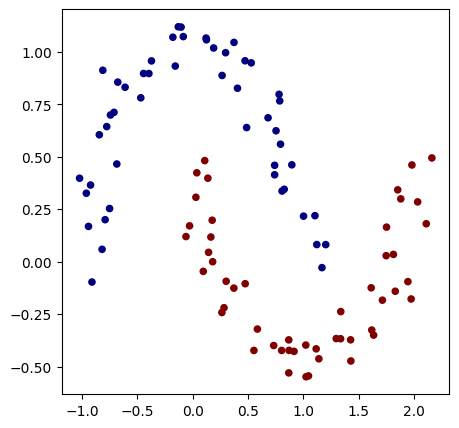

In [3]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(n_samples=100, noise=0.1)

y = y * 2 - 1  # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [35]:
model = Network([
    Layer(2, 16, ReLU),
    Layer(16, 16, ReLU),
    Layer(16, 1)
]) 

In [36]:
optimizer = SGD(model)
batch_size = 2
learning_rate = 0.01
epochs = 10000

for _ in range(epochs):
    loss = optimizer.step(Tensor(X), Tensor(y), learning_rate, HingeLoss, batch_size).data
    if _ % (epochs / 10) == 0:
        print(loss)

66.29908978252303
2.25447724315184
2.0154479163652863
0.3228996757696794
2.470473492246183
2.226276100733378
0.6145674454896537
2.0553001223702934
0.0
2.1981419531935003


(-1.548639298268643, 1.951360701731357)

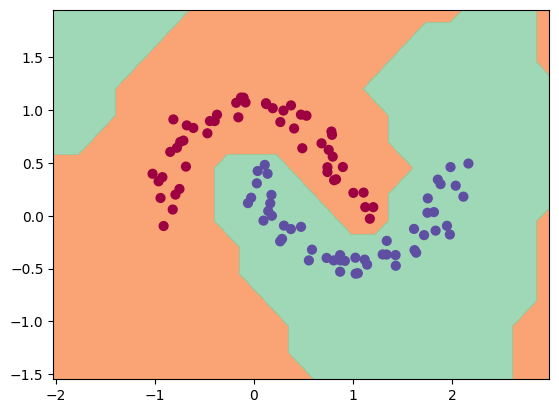

In [37]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = Tensor([list(xrow) for xrow in Xmesh])
scores = model.forward(inputs)
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())